In [2]:
import os
import random
import cv2
import numpy as np
import tensorflow as tf
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = 'flowers'

train_dt = os.path.join(data, '/content/drive/MyDrive/flowers_dataset_training')
test_dt = os.path.join(data, '/content/drive/MyDrive/flowers_dataset_testing')

In [7]:
train_data = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_data.flow_from_directory(
        train_dt,  # Source directory for training images
        target_size=(320,240),  
        batch_size=20,
        color_mode="grayscale",
        class_mode='categorical')

Found 577 images belonging to 3 classes.


In [8]:
test_data = ImageDataGenerator(rescale=1./255)

test_generator = test_data.flow_from_directory(
        test_dt,
        target_size=(320,240),
        batch_size=20,
        color_mode="grayscale",
        class_mode='categorical')

Found 60 images belonging to 3 classes.


In [14]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(320,240,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 316, 236, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 158, 118, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 154, 114, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 77, 57, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 280896)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               71909632  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [15]:
model_1.compile(optimizer=Adam(lr=0.12),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [16]:
history = model_1.fit(
    train_generator,
    epochs=50,
    verbose=1,
    validation_data=test_generator,
)

Epoch 1/50
29/29 [==============================] - 168s 6s/step - loss: 98680.7734 - accuracy: 0.5667 - val_loss: 2.5013 - val_accuracy: 0.3333
Epoch 2/50
29/29 [==============================] - 121s 4s/step - loss: 0.9001 - accuracy: 0.6898 - val_loss: 1.7568 - val_accuracy: 0.3333
Epoch 3/50
29/29 [==============================] - 121s 4s/step - loss: 0.8422 - accuracy: 0.7175 - val_loss: 1.3982 - val_accuracy: 0.3333
Epoch 4/50
29/29 [==============================] - 121s 4s/step - loss: 0.8070 - accuracy: 0.7227 - val_loss: 1.3744 - val_accuracy: 0.3333
Epoch 5/50
29/29 [==============================] - 129s 4s/step - loss: 0.7889 - accuracy: 0.7227 - val_loss: 1.4330 - val_accuracy: 0.3333
Epoch 6/50
29/29 [==============================] - 122s 4s/step - loss: 0.7936 - accuracy: 0.7227 - val_loss: 1.3208 - val_accuracy: 0.3333
Epoch 7/50
29/29 [==============================] - 122s 4s/step - loss: 0.7893 - accuracy: 0.7227 - val_loss: 1.4585 - val_accuracy: 0.3333
Epoch 8/5

In [21]:
val_loss_1 = history.history['val_loss']
val_acc_1 = history.history['val_accuracy']

val_acc_1 = history.history['val_accuracy']

accuracy_1 = history.history['accuracy']
loss_1 = history.history['loss']

print(val_acc_1[-1])
print(accuracy_1[-1])

0.3333333432674408
0.7227036356925964


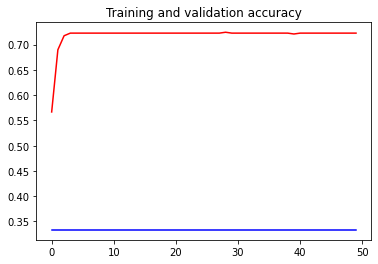

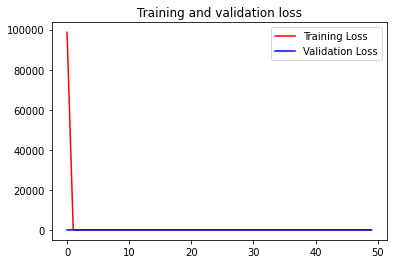

In [22]:
import matplotlib.pyplot as plt
acc = accuracy_1
val_accuracy = val_acc_1
loss = loss_1
val_loss = val_loss_1

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

In [9]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(320,240,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 316, 236, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 158, 118, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 154, 114, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 77, 57, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 280896)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               71909632  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [10]:
model_2.compile(optimizer=Adam(lr=0.75),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [11]:
history = model_2.fit(
    train_generator,
    epochs=50,
    verbose=1,
    validation_data=test_generator,
)

Epoch 1/50
29/29 [==============================] - 397s 14s/step - loss: 124488616.0000 - accuracy: 0.5719 - val_loss: 1.8536 - val_accuracy: 0.3333
Epoch 2/50
29/29 [==============================] - 125s 4s/step - loss: 0.9582 - accuracy: 0.6915 - val_loss: 1.6809 - val_accuracy: 0.3333
Epoch 3/50
29/29 [==============================] - 120s 4s/step - loss: 0.8078 - accuracy: 0.7227 - val_loss: 1.4855 - val_accuracy: 0.3333
Epoch 4/50
29/29 [==============================] - 120s 4s/step - loss: 0.8138 - accuracy: 0.7227 - val_loss: 1.3721 - val_accuracy: 0.3333
Epoch 5/50
29/29 [==============================] - 120s 4s/step - loss: 0.7985 - accuracy: 0.7227 - val_loss: 1.5093 - val_accuracy: 0.3333
Epoch 6/50
29/29 [==============================] - 119s 4s/step - loss: 0.8096 - accuracy: 0.7227 - val_loss: 1.4720 - val_accuracy: 0.3333
Epoch 7/50
29/29 [==============================] - 125s 4s/step - loss: 0.8104 - accuracy: 0.7227 - val_loss: 1.4025 - val_accuracy: 0.3333
Epoc

In [14]:
val_loss_2 = history.history['val_loss']
val_acc_2 = history.history['val_accuracy']

accuracy_2 = history.history['accuracy']
loss_2 = history.history['loss']

print(val_acc_2[-1])
print(accuracy_2[-1])

0.3333333432674408
0.7227036356925964


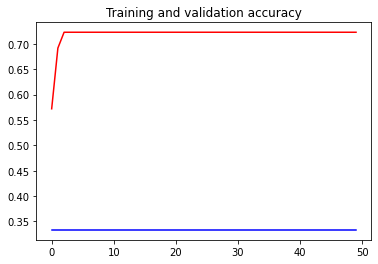

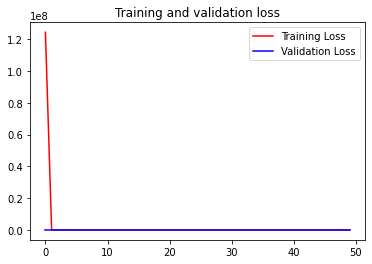

In [15]:
acc = accuracy_2
val_accuracy = val_acc_2
loss = loss_2
val_loss = val_loss_2
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()